
# **NOTEBOOK FINAL PROJET DEEP LEARNING**
## Classification de tableaux et de courant artistique


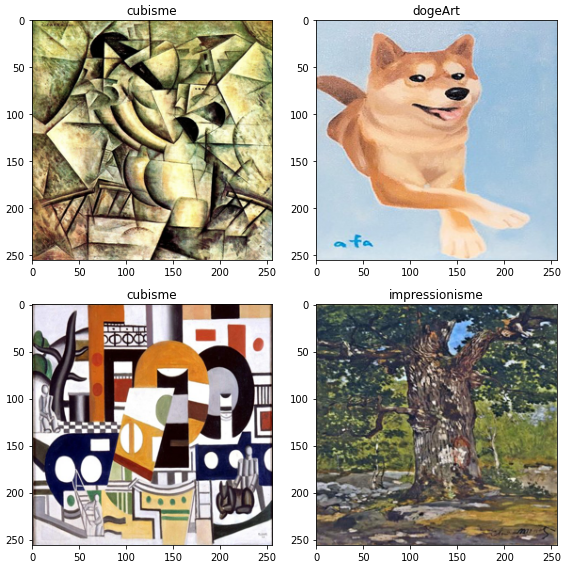

*Réalisé par MOUSSET Thibault, LI Arnaud, MOUSSET Thibault et HEURTEBISE Tom,
Eleves en Deuxième Année à l'ENSEEIHT* 
Rapport remis le 29/05/2022

# Chargement des données

Dans notre projet **Classification de peintures selon leur courant artistiques **, nous avons choisi de classifier des images associées à 4 labels différents : **cubisme**, **impressionisme** et **surrealisme** (finalement réduit à 3 classes puisque suppression du surrealisme).

Nous avons réparti nos images dans 3 ensembles (et donc 3 dossiers): *apprentissage* (3 images par classe), *test* (1 image par classe) et *validation* (1 image par classe). Chacun de ces dossiers contient l'ensemble des images dont le prefixe du nom de fichier est **doge**,**cubisme**, **impressionisme**. Ainsi l'étiquette associée à chaque fichier se retrouve dans le nomdu fichier. L'arborescence est résumée sur l'image ci-dessus.

Nous avons chosi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide.

In [ ]:
!git clone https://github.com/Tibo-Mouss/image_database_painting_sans_surrealisme.git


fatal: destination path 'image_database_painting_sans_surrealisme' already exists and is not an empty directory.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. 

In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat

path = "./image_database_painting_sans_surrealisme/"     #root of the project
def load_data(data_path, classes, dataset='train', image_size=64):
    """ Chargement des données
    :param data_path : chemin ou se trouve les images
    :param classes : tableau contenant les labels
    :param dataset : nom de l'ensemble concerné (apprentissage, test ou validation)
    :param image_size : taille des images (images_size x image_size)
    """
    num_images = 0
    dirs = sorted(os.listdir(data_path + dataset + '/')) #Renvoit la liste des fichiers 
    num_images = len(dirs)   #Nombre d'images total
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    # Chargement des images, 
    for idx_img in range(len(dirs)):
      item = dirs[idx_img]  #fichier
      if os.path.isfile(data_path + dataset + '/' + item):
        # Ouverture de l'image
        img = Image.open(data_path + dataset + '/' + item)
        # Conversion de l'image en RGB
        img = img.convert('RGB')
        # Redimensionnement de l'image et écriture dans la variable de retour x 
        img = img.resize((image_size,image_size))
        x[idx_img] = np.asarray(img)
        
        # Écriture du label associé dans la variable de retour y => changement par rapport à l'original
        img_name_split = item.split('.')
        class_label = classes.index(img_name_split[0])
        y[idx_img] = class_label
                
    return x, y

Voici le chargement des données à proprement parler.

In [ ]:
labels = ['cubisme', 'dogeArt', 'impressionisme']
IMAGE_SIZE = 256

x_train, y_train = load_data(path, labels, dataset='apprentissage', image_size=IMAGE_SIZE)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=IMAGE_SIZE)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=IMAGE_SIZE)
print(x_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(1572, 256, 256, 3) (1572, 1)
(335, 256, 256, 3) (335, 1)
(337, 256, 256, 3) (337, 1)


Affichage de quelques images pour vérifier que tout s'est bien passé.

[ 98 198  40 286  14 158  62 106 301]


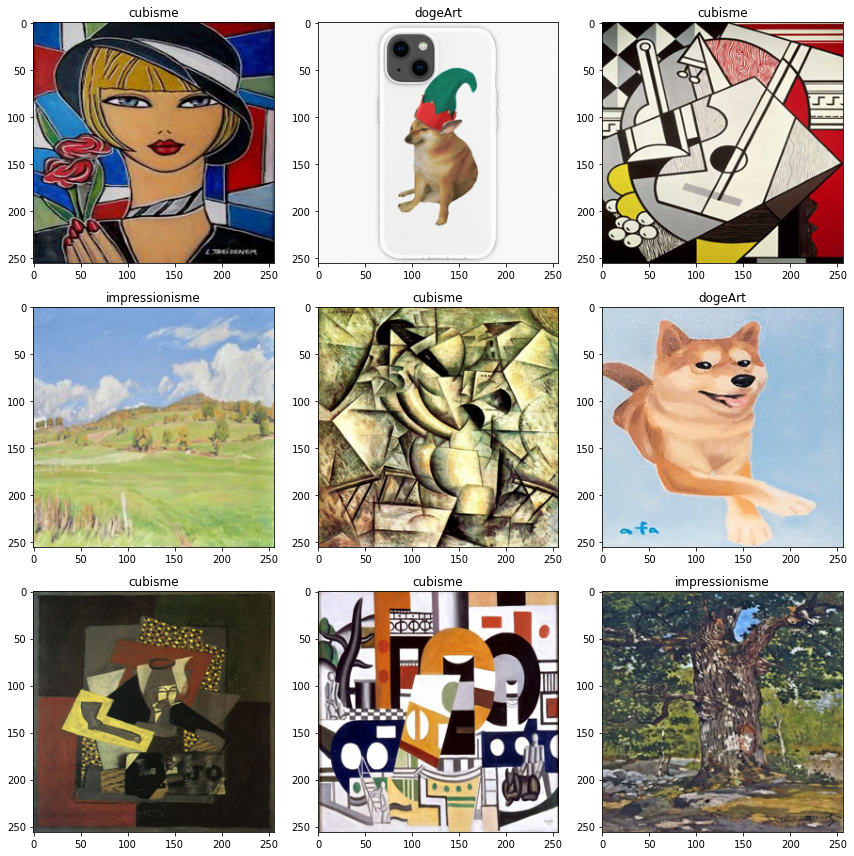

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
suffle_indices = np.random.randint(low=0,high=x_val.shape[0],size=(9))
print(suffle_indices)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    ind = suffle_indices[i]
    image = x_val[ind]
    plt.title(labels[int(y_val[ind])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

# Premier test Naif : VGG basique

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
# A COMPLETER

model.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
# Couche dense, à 512 neurones
model.add(Dense(512,activation='relu'))

model.add(Dense(3,activation='softmax'))   # Couche de sortie

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 96)       0

In [ ]:
from tensorflow.keras import losses as losses
model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=10)

Epoch 1/10
158/158 [==============================] - 124s 781ms/step - loss: 5.9653 - sparse_categorical_accuracy: 0.4917 - val_loss: 1.1623 - val_sparse_categorical_accuracy: 0.4537
Epoch 2/10
158/158 [==============================] - 122s 771ms/step - loss: 0.8228 - sparse_categorical_accuracy: 0.6450 - val_loss: 0.9836 - val_sparse_categorical_accuracy: 0.5910
Epoch 3/10
158/158 [==============================] - 122s 771ms/step - loss: 0.6192 - sparse_categorical_accuracy: 0.7424 - val_loss: 1.0225 - val_sparse_categorical_accuracy: 0.5642
Epoch 4/10
158/158 [==============================] - 125s 794ms/step - loss: 0.4969 - sparse_categorical_accuracy: 0.8022 - val_loss: 1.2090 - val_sparse_categorical_accuracy: 0.5522
Epoch 5/10
158/158 [==============================] - 126s 800ms/step - loss: 0.4091 - sparse_categorical_accuracy: 0.8505 - val_loss: 1.3046 - val_sparse_categorical_accuracy: 0.5403
Epoch 6/10
158/158 [==============================] - 125s 791ms/step - loss: 0.

In [ ]:
def plot_training_analysis():
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

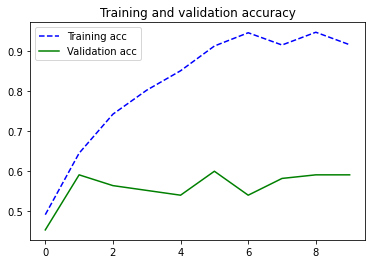

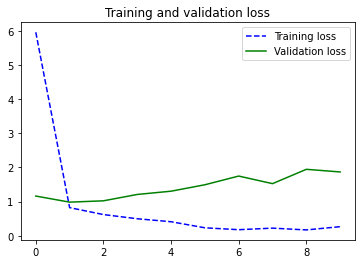

In [ ]:
plot_training_analysis()

On observe un problème de surapprentissage. Nous allons donc faire de l'augmentation. 


# Augmentation de la base de données

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=3,      #Degree range for random rotations. 
    width_shift_range=0.1,  #Bornes intervalle pour décalage de l'image horizontal
    height_shift_range=0.1, #Bornes intervalle pour décalage de l'image vertical
    shear_range=0.1,        #Range pour parametre de découpe de l'image
    zoom_range=0.1,         #Range pour le zoom
    horizontal_flip=True)   # 	Boolean. Randomly flip inputs horizontally. 


# VGG avec Augmentation de données

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
# A COMPLETER

model.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
# Couche dense, à 512 neurones
model.add(Dense(512,activation='relu'))

model.add(Dense(3,activation='softmax'))   # Couche de sortie


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 96)       0

In [ ]:
from tensorflow.keras import losses as losses
model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['sparse_categorical_accuracy'])

## Test de VGG sur 100 epochs

In [ ]:

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=100,
                    )

Epoch 1/100
158/158 [==============================] - 132s 833ms/step - loss: 7.2668 - sparse_categorical_accuracy: 0.4561 - val_loss: 1.0573 - val_sparse_categorical_accuracy: 0.5015
Epoch 2/100
158/158 [==============================] - 130s 821ms/step - loss: 0.8909 - sparse_categorical_accuracy: 0.5954 - val_loss: 1.0449 - val_sparse_categorical_accuracy: 0.5791
Epoch 3/100
158/158 [==============================] - 129s 815ms/step - loss: 0.8124 - sparse_categorical_accuracy: 0.6527 - val_loss: 0.9073 - val_sparse_categorical_accuracy: 0.6030
Epoch 4/100
158/158 [==============================] - 134s 846ms/step - loss: 0.7995 - sparse_categorical_accuracy: 0.6469 - val_loss: 0.8635 - val_sparse_categorical_accuracy: 0.5970
Epoch 5/100
158/158 [==============================] - 137s 864ms/step - loss: 0.7884 - sparse_categorical_accuracy: 0.6603 - val_loss: 0.9562 - val_sparse_categorical_accuracy: 0.5791
Epoch 6/100
158/158 [==============================] - 134s 850ms/step - lo

## Test sur 30 epcohs seulement et sauvegarde des poids

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

#VGG BASIQUE juste avec du padding
model2 = Sequential()

model2.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(96,(3,3),activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
# Couche dense, à 512 neurones
model2.add(Dense(512,activation='relu'))

model2.add(Dense(3,activation='softmax'))   # Couche de sortie

from tensorflow.keras import losses as losses
model2.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['sparse_categorical_accuracy'])


#Créer un checkpoint
import tensorflow as tf
#checkpoint_filepath = '/tmp/checkpoint'
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#    filepath=checkpoint_filepath,
#    monitor='val_sparse_categorical_accuracy',
#    mode='max',
#    save_best_only=True)

#Entrainer le modèle
history2 = model2.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=30
                    )


Epoch 1/30
158/158 [==============================] - 127s 797ms/step - loss: 6.8238 - sparse_categorical_accuracy: 0.4917 - val_loss: 0.9446 - val_sparse_categorical_accuracy: 0.6000
Epoch 2/30
158/158 [==============================] - 125s 792ms/step - loss: 0.8733 - sparse_categorical_accuracy: 0.6075 - val_loss: 0.9785 - val_sparse_categorical_accuracy: 0.5761
Epoch 3/30
158/158 [==============================] - 125s 791ms/step - loss: 0.8381 - sparse_categorical_accuracy: 0.6368 - val_loss: 0.9333 - val_sparse_categorical_accuracy: 0.6269
Epoch 4/30
158/158 [==============================] - 125s 790ms/step - loss: 0.8094 - sparse_categorical_accuracy: 0.6533 - val_loss: 0.8756 - val_sparse_categorical_accuracy: 0.6000
Epoch 5/30
158/158 [==============================] - 125s 790ms/step - loss: 0.7981 - sparse_categorical_accuracy: 0.6616 - val_loss: 0.8582 - val_sparse_categorical_accuracy: 0.5940
Epoch 6/30
158/158 [==============================] - 125s 791ms/step - loss: 0.

In [ ]:
def plot_training_analysis2(history):
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
import matplotlib.pyplot as plt
plot_training_analysis2(history2)

In [ ]:
!zip -r /tmp/checkpoint.zip /tmp/checkpoint/
files.download('/tmp/checkpoint.zip')
#plot_training_analysis()

  adding: tmp/checkpoint/ (stored 0%)
  adding: tmp/checkpoint/saved_model.pb (deflated 89%)
  adding: tmp/checkpoint/keras_metadata.pb (deflated 92%)
  adding: tmp/checkpoint/assets/ (stored 0%)
  adding: tmp/checkpoint/variables/ (stored 0%)
  adding: tmp/checkpoint/variables/variables.index (deflated 67%)
  adding: tmp/checkpoint/variables/variables.data-00000-of-00001 (deflated 13%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Reseau final un peu plus complexe (CNN du TP 6 ou 7)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Dropout


#CNN ou on double les couches (comme celui du TP 6 ou 7)
model3 = Sequential()

model3.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding='same'))
model3.add(Conv2D(32,(3,3),activation='relu', padding='same'))

model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model3.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model3.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
# Couche dense, à 512 neurones
model3.add(Dense(1024,activation='relu'))

model3.add(Dense(3,activation='softmax'))   # Couche de sortie

from tensorflow.keras import losses as losses
model3.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['sparse_categorical_accuracy'])


#Créer un checkpoint
import tensorflow as tf
checkpoint_filepath = '/tmp/checkpoint2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    save_best_only=True)

#Entrainer le modèle
history3 = model3.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=30,callbacks=[model_checkpoint_callback]
                    )


Epoch 1/30
158/158 [==============================] - 425s 3s/step - loss: 6.6505 - sparse_categorical_accuracy: 0.5445 - val_loss: 0.8630 - val_sparse_categorical_accuracy: 0.6269
Epoch 2/30
158/158 [==============================] - 410s 3s/step - loss: 0.8414 - sparse_categorical_accuracy: 0.6482 - val_loss: 0.8479 - val_sparse_categorical_accuracy: 0.6149
Epoch 3/30
158/158 [==============================] - 413s 3s/step - loss: 0.8006 - sparse_categorical_accuracy: 0.6597 - val_loss: 0.9210 - val_sparse_categorical_accuracy: 0.5612
Epoch 4/30
158/158 [==============================] - 424s 3s/step - loss: 0.7769 - sparse_categorical_accuracy: 0.6718 - val_loss: 0.8541 - val_sparse_categorical_accuracy: 0.6328
Epoch 5/30
158/158 [==============================] - 410s 3s/step - loss: 0.7207 - sparse_categorical_accuracy: 0.7010 - val_loss: 0.8734 - val_sparse_categorical_accuracy: 0.6060
Epoch 6/30
158/158 [==============================] - 420s 3s/step - loss: 0.7244 - sparse_cate

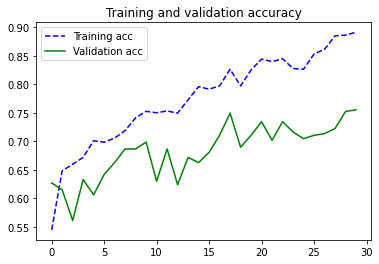

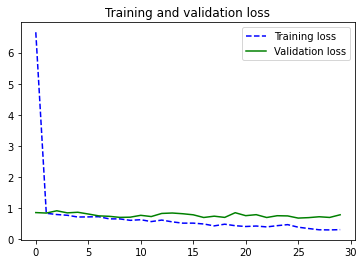

In [ ]:
import matplotlib.pyplot as plt
plot_training_analysis2(history3)

## Pour sauvegarder les poids

In [ ]:
# Enregistrement des poids
!zip -r /tmp/checkpoint2.zip /tmp/checkpoint2/


  adding: tmp/checkpoint2/ (stored 0%)
  adding: tmp/checkpoint2/saved_model.pb (deflated 89%)
  adding: tmp/checkpoint2/keras_metadata.pb (deflated 93%)
  adding: tmp/checkpoint2/assets/ (stored 0%)
  adding: tmp/checkpoint2/variables/ (stored 0%)
  adding: tmp/checkpoint2/variables/variables.index (deflated 70%)
  adding: tmp/checkpoint2/variables/variables.data-00000-of-00001 (deflated 27%)


In [ ]:
from google.colab import files
files.download('/tmp/checkpoint2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls /tmp/checkpoint2/

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /tmp/checkpoint2.zip /content/drive/MyDrive/

## Analyse des résultats

In [ ]:
#prediction du modele sur ensemble de test
y_pred=model3.predict(x_test)

In [ ]:
#Conversion des mechants float en 0, 1 ou 2 (les indices de nos 3 classes)
y_pred_forme = np.argmax(y_pred,axis=1)

In [ ]:
#Conversion des float des etiquettes etablies lors du chargement des images de test en int
y_test_forme = np.concatenate(y_test,axis=0).astype(int)

## Matrice de confusion

In [ ]:
#CREATION MATRICE CONFUSION (https://androidkt.com/keras-confusion-matrix-in-tensorboard/#:~:text=%20TensorFlow%20Keras%20Confusion%20Matrix%20in%20TensorBoard%20,boilerplate%20code%20to%20convert%20the%20plot...%20More%20)
import pandas as pd
import numpy as np

#Création de la matrice de confusion
con_mat = tf.math.confusion_matrix(labels=y_test_forme, predictions=y_pred_forme).numpy()

#Normalisation et ajout des étiquettes 
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = ['cubisme', 'dogeArt', 'impressionisme'], 
                     columns = ['cubisme', 'dogeArt', 'impressionisme'])

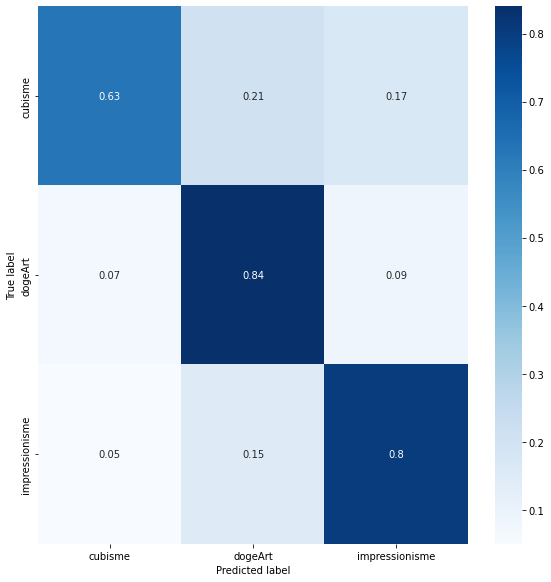

In [ ]:
#Affichage matrice confusion
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Precision par classe et globale

In [ ]:
#Precision globale et par classe
from sklearn.metrics import classification_report
print(classification_report(y_test_forme, y_pred_forme))

              precision    recall  f1-score   support

           0       0.85      0.63      0.72       121
           1       0.67      0.84      0.75       101
           2       0.76      0.80      0.78       115

    accuracy                           0.75       337
   macro avg       0.76      0.76      0.75       337
weighted avg       0.77      0.75      0.75       337



## Analyse qualitative avec exemples

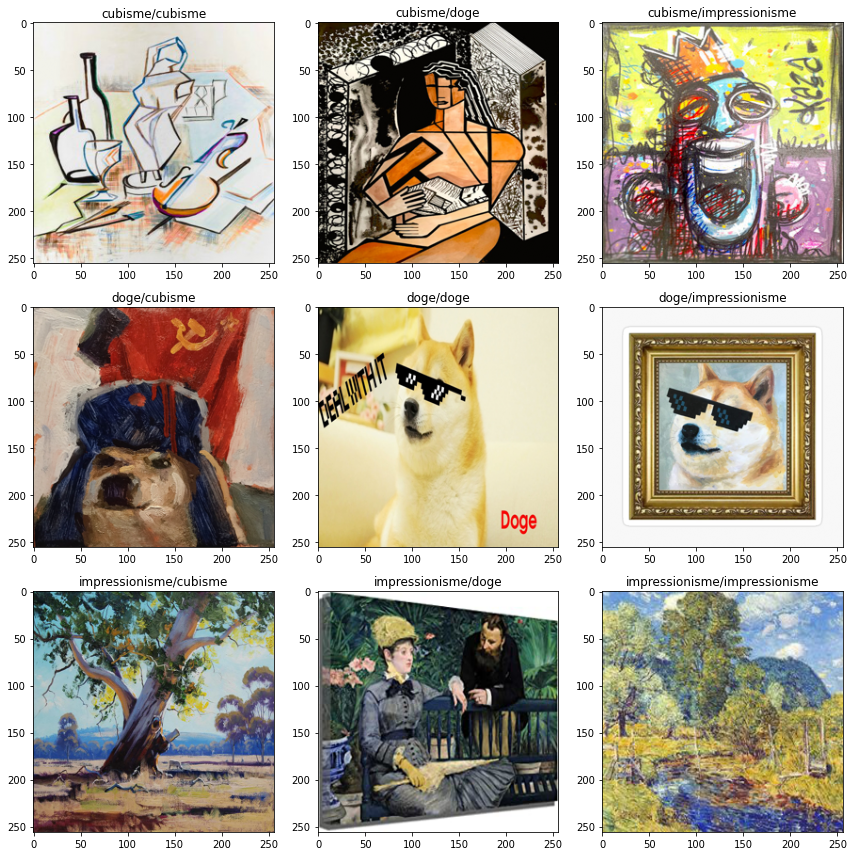

In [ ]:
#Affichage d'exemples

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
indices_exemples=[0,44,12,199,131,198,336,330,306]
legendes=["cubisme/cubisme","cubisme/doge","cubisme/impressionisme","doge/cubisme","doge/doge","doge/impressionisme","impressionisme/cubisme","impressionisme/doge","impressionisme/impressionisme"]
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_test[indices_exemples[i]]
    plt.title(legendes[i])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()